In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import *

In [7]:
df = pd.read_csv('bank.csv', sep=';')
df_add = pd.read_csv('bank-additional.csv', sep=';')
df_add_full = pd.read_csv('bank-additional-full.csv', sep=';')
df_full = pd.read_csv('bank-full.csv', sep=';')


*   1 - age (numeric)
*   2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
*   3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
*   4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
*   5 - default: has credit in default? (categorical: "no","yes","unknown")
*   6 - housing: has housing loan? (categorical: "no","yes","unknown")
*   7 - loan: has personal loan? (categorical: "no","yes","unknown")
   ## related with the last contact of the current campaign:
*   8 - contact: contact communication type (categorical: "cellular","telephone") 
*   9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
*  10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
*  11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
   ## other attributes:
*  12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
*  13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
*  14 - previous: number of contacts performed before this campaign and for this client (numeric)
*  15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
   ## social and economic context attributes
*  16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
*  17 - cons.price.idx: consumer price index - monthly indicator (numeric)     
*  18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
*  19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
*  20 - nr.employed: number of employees - quarterly indicator (numeric)

   ## Output variable (desired target):
*  21 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [27]:
df_add_full = df_add_full.drop_duplicates()

In [28]:
df_add_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

In [29]:
df_add_full.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [30]:
for col in df_add_full:
    if df_add_full[col].dtype == 'object':
        temp = df_add_full[col].unique()
        print(col, len(temp), temp, '\n')

job 12 ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student'] 

marital 4 ['married' 'single' 'divorced' 'unknown'] 

education 8 ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate'] 

default 3 ['no' 'unknown' 'yes'] 

housing 3 ['no' 'yes' 'unknown'] 

loan 3 ['no' 'yes' 'unknown'] 

contact 2 ['telephone' 'cellular'] 

month 10 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep'] 

day_of_week 5 ['mon' 'tue' 'wed' 'thu' 'fri'] 

poutcome 3 ['nonexistent' 'failure' 'success'] 

y 2 ['no' 'yes'] 



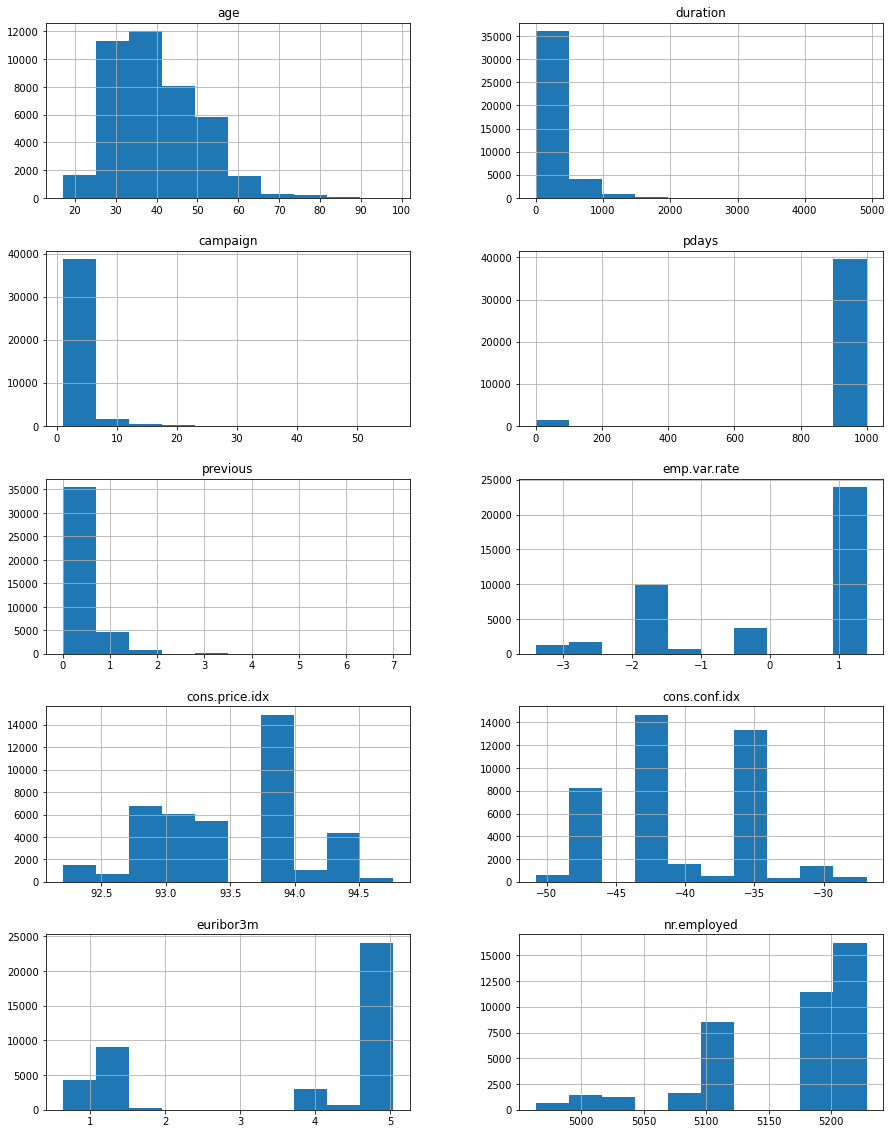

In [45]:
fig, axes = plt.subplots(nrows=5, ncols=2,figsize=(15,20))
df_add_full.hist(ax=axes)
plt.show()

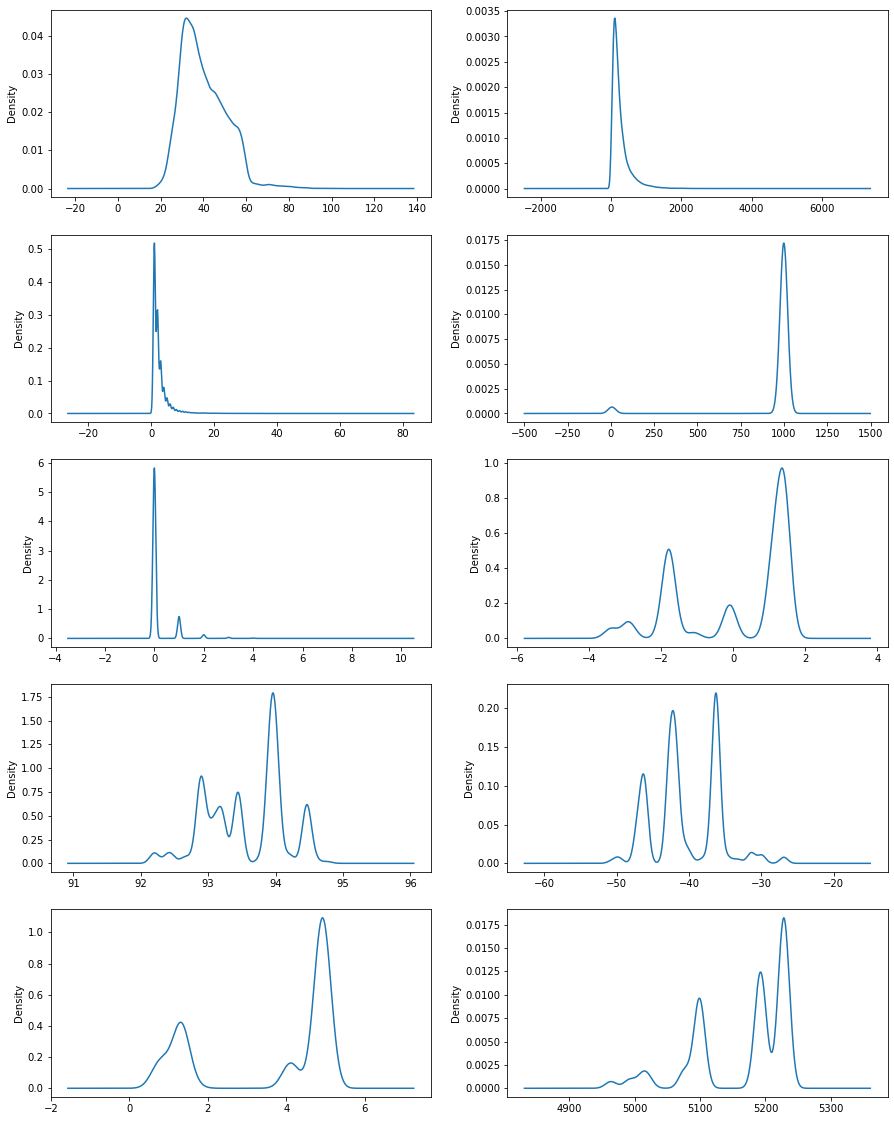

In [55]:
fig, axes = plt.subplots(nrows=5, ncols=2,figsize=(15,20))
axes = axes.ravel()
for i, c in enumerate(df_add_full.drop(columns=obj_col).columns):
    df_add_full.drop(columns=obj_col)[c].plot.density(ax=axes[i])
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'get_figure'

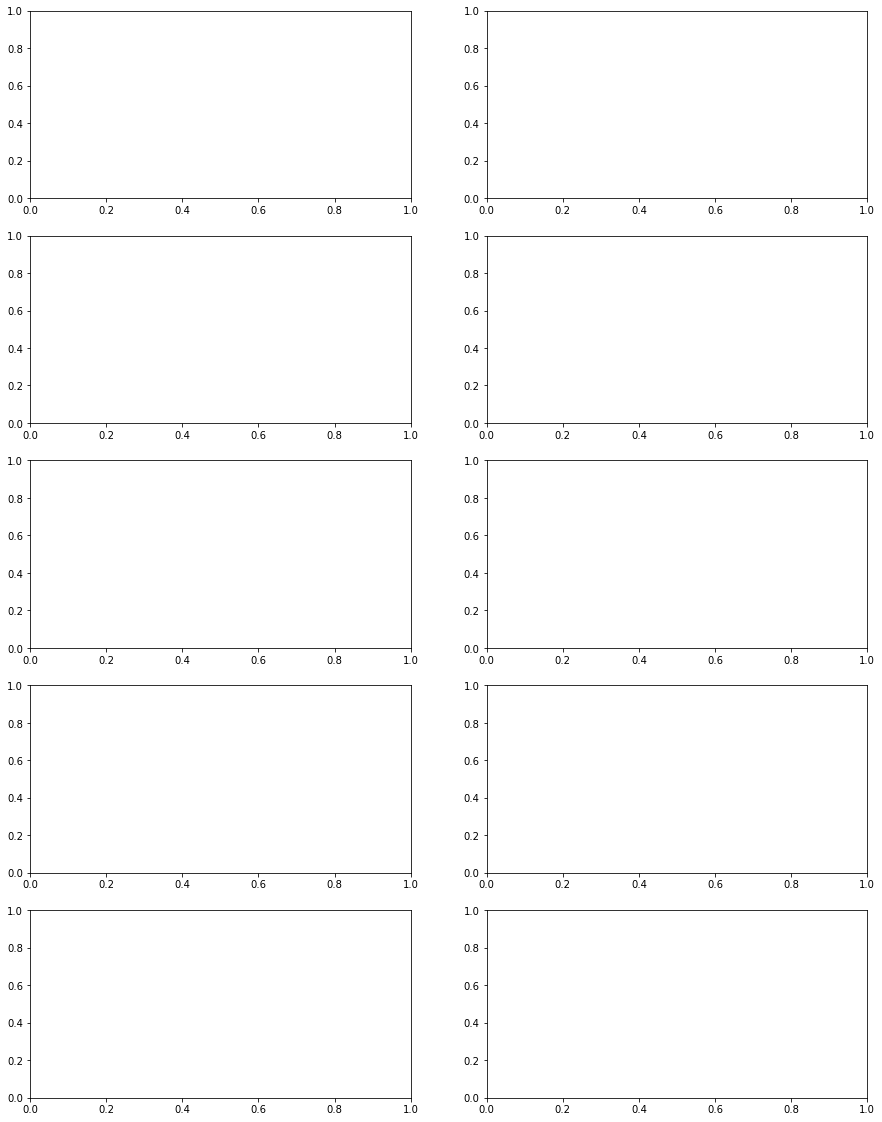

In [57]:
fig, axes = plt.subplots(nrows=5, ncols=2,figsize=(15,20))
df_add_full.plot.bar(ax=axes, column=obj_col)
plt.show()

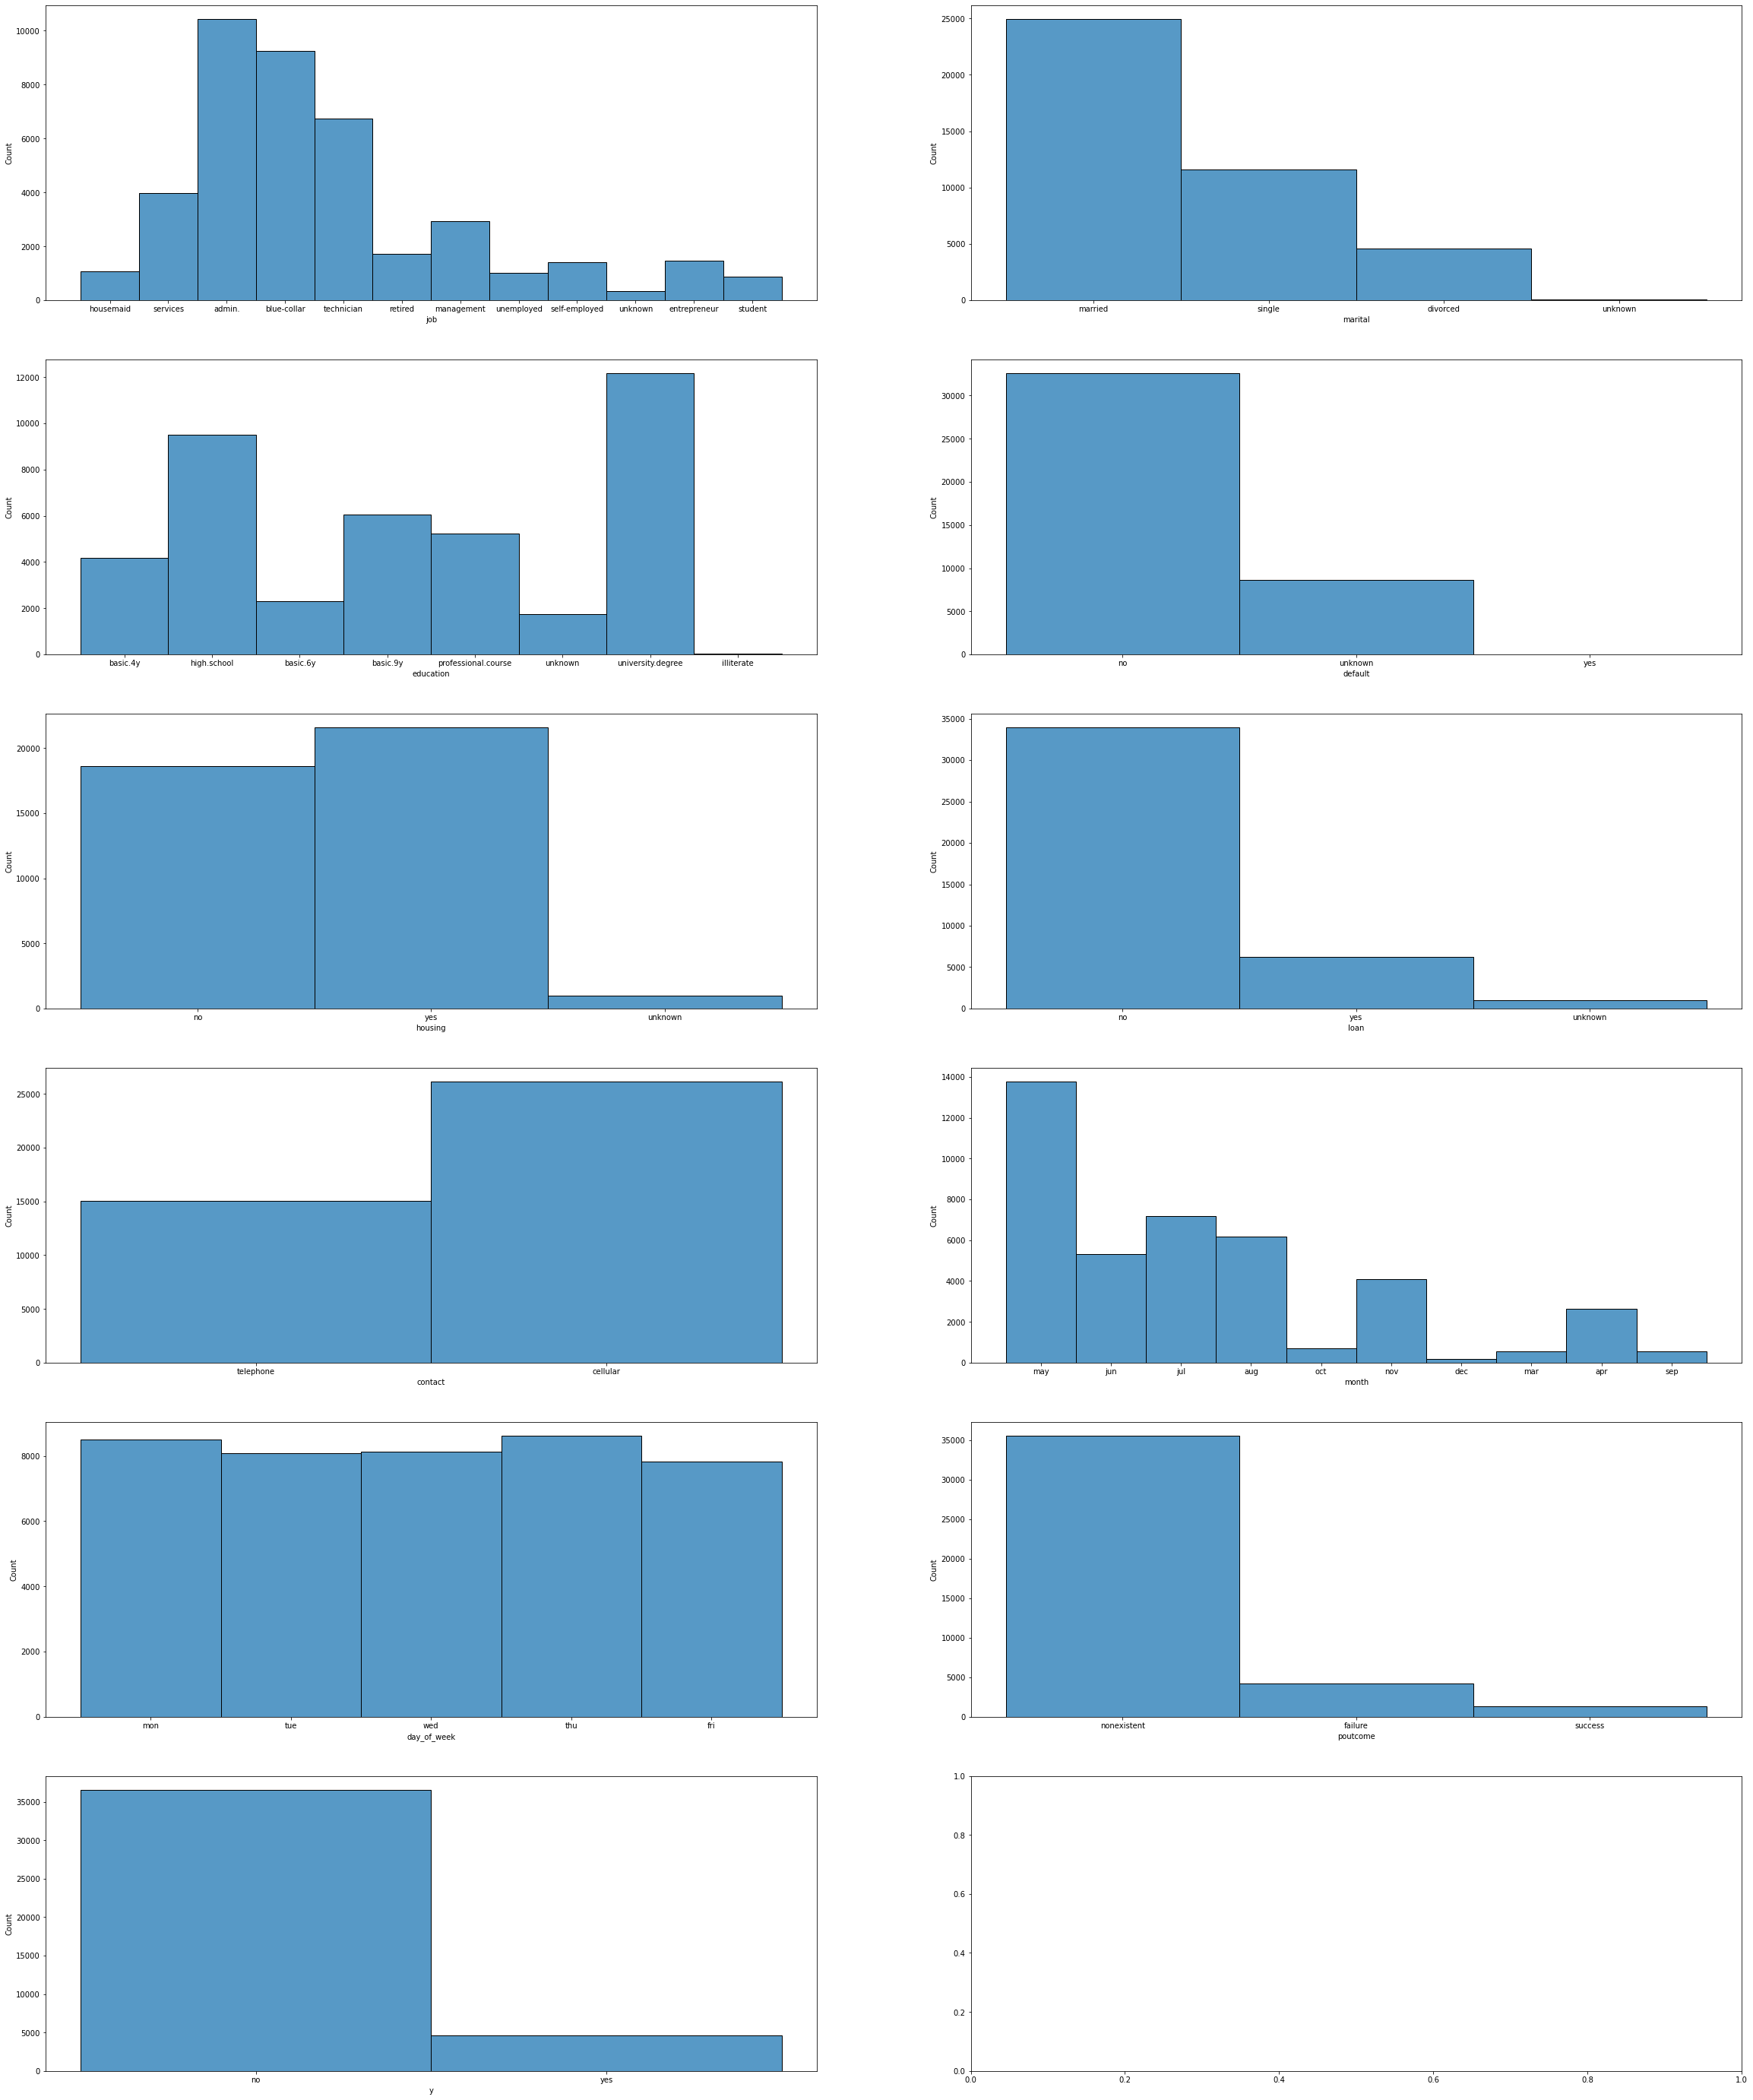

In [73]:
fig, axes = plt.subplots(nrows=6, ncols=2,figsize=(40,50))
axes = axes.ravel()
for i, c in enumerate(obj_col):
    sns.histplot(df_add_full[c], ax=axes[i])
plt.show()

In [48]:
obj_col = []
for col in df_add_full:
    if df_add_full[col].dtype == 'object':
        temp = df_add_full[col].unique()
        obj_col.append(col)

In [60]:
obj_col

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [ ]:
# pdays - drop
# campaign - categorize/drop
# previous - categorize/drop

<AxesSubplot:>

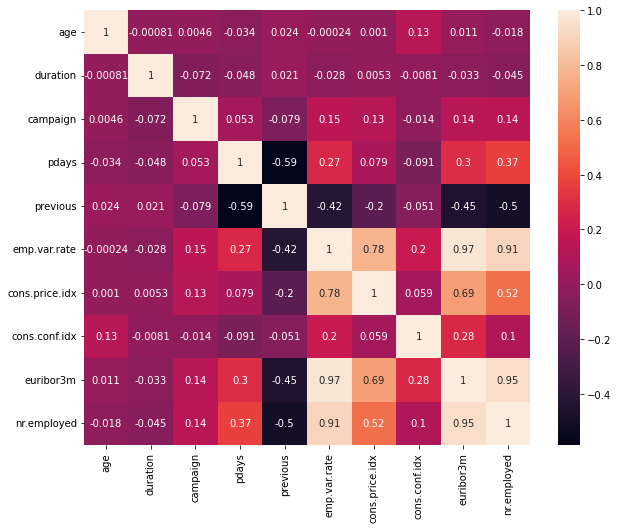

In [46]:
plt.figure(figsize=(10,8))
sns.heatmap(df_add_full.corr(), annot=True)